In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\user\Documents\School Stuffs\Dental Utilization by Provider CY 2022 (Dataset).csv')
df.head()

,RENDERING NPI,PROVIDER LEGAL NAME,CALENDAR YEAR,DELIVERY SYSTEM,PROVIDER TYPE,AGE GROUP,ADV USER CNT,ADV USER ANNOTATION CODE,ADV SVC CNT,ADV SVC ANNOTATION CODE,...,PREV SVC CNT,PREV SVC ANNOTATION CODE,TXMT USER CNT,TXMT USER ANNOTATION CODE,TXMT SVC CNT,TXMT SVC ANNOTATION CODE,EXAM USER CNT,EXAM USER ANNOTATION CODE,EXAM SVC CNT,EXAM SVC ANNOTATION CODE
0,1003000175,REYES-VASQUEZ BELINDA,2022,FFS,RENDERING,AGE 21+,146.0,NaN,290.0,NaN,...,0.0,NaN,146.0,NaN,238.0,NaN,52.0,NaN,52.0,NaN
1,1003004698,"GODFREY III, MERLE FRANKLIN,",2022,FFS,RENDERING,AGE 21+,613.0,NaN,3415.0,NaN,...,1138.0,NaN,612.0,NaN,1595.0,NaN,594.0,NaN,594.0,NaN
2,1003009440,VONTELA REKHA,2022,FFS,RENDERING,AGE 0-20,548.0,NaN,7007.0,NaN,...,2528.0,NaN,221.0,NaN,570.0,NaN,520.0,NaN,670.0,NaN
3,1003009440,VONTELA REKHA,2022,FFS,RENDERING,AGE 21+,636.0,NaN,4740.0,NaN,...,1048.0,NaN,298.0,NaN,755.0,NaN,537.0,NaN,537.0,NaN
4,1003010372,LIM KYUNG A,2022,FFS,RENDERING,AGE 0-20,171.0,NaN,859.0,NaN,...,308.0,NaN,50.0,NaN,75.0,NaN,142.0,NaN,146.0,NaN


In [7]:
 # Dataset Shape
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (25078, 22)


In [8]:
# Dataset Info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25078 entries, 0 to 25077
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RENDERING NPI              25078 non-null  int64  
 1   PROVIDER LEGAL NAME        25078 non-null  object 
 2   CALENDAR YEAR              25078 non-null  int64  
 3   DELIVERY SYSTEM            25078 non-null  object 
 4   PROVIDER TYPE              25078 non-null  object 
 5   AGE GROUP                  25078 non-null  object 
 6   ADV USER CNT               19672 non-null  float64
 7   ADV USER ANNOTATION CODE   5406 non-null   float64
 8   ADV SVC CNT                19672 non-null  float64
 9   ADV  SVC ANNOTATION CODE   5406 non-null   float64
 10  PREV USER CNT              20671 non-null  float64
 11  PREV USER ANNOTATION CODE  4407 non-null   float64
 12  PREV SVC CNT               20671 non-null  float64
 13  PREV SVC ANNOTATION CODE   4407


Summary Statistics:
       RENDERING NPI  CALENDAR YEAR  ADV USER CNT  ADV USER ANNOTATION CODE  \
count   2.507800e+04        25078.0  19672.000000                    5406.0   
mean    1.500901e+09         2022.0    365.972346                       1.0   
std     2.900686e+08            0.0    643.458180                       0.0   
min     1.003000e+09         2022.0     11.000000                       1.0   
25%     1.245846e+09         2022.0     61.000000                       1.0   
50%     1.508295e+09         2022.0    177.000000                       1.0   
75%     1.750457e+09         2022.0    422.000000                       1.0   
max     1.992998e+09         2022.0  13726.000000                       1.0   

         ADV SVC CNT  ADV  SVC ANNOTATION CODE  PREV USER CNT  \
count   19672.000000               5406.000000   20671.000000   
mean     2580.662414                  1.361820     217.196991   
std      6699.328436                  0.480572     511.952246   
min    

In [13]:
# 1. Checking Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percentage.round(2)
})

# Display columns with missing data
missing_report = missing_report[missing_report['Missing Values'] > 0]
print(missing_report)

                           Missing Values  Missing %
ADV USER CNT                         5406      21.56
ADV USER ANNOTATION CODE            19672      78.44
ADV SVC CNT                          5406      21.56
ADV  SVC ANNOTATION CODE            19672      78.44
PREV USER CNT                        4407      17.57
PREV USER ANNOTATION CODE           20671      82.43
PREV SVC CNT                         4407      17.57
PREV SVC ANNOTATION CODE            20671      82.43
TXMT USER CNT                        5354      21.35
TXMT USER ANNOTATION CODE           19724      78.65
TXMT SVC CNT                         5354      21.35
TXMT SVC ANNOTATION CODE            19724      78.65
EXAM USER CNT                        4600      18.34
EXAM USER ANNOTATION CODE           20478      81.66
EXAM SVC CNT                         4600      18.34
EXAM SVC ANNOTATION CODE            20478      81.66


In [14]:
# 2. Dropping Columns with too much missing data (e.g., Annotation Code columns)
columns_to_drop = [col for col in df.columns if 'ANNOTATION CODE' in col]
df_cleaned = df.drop(columns=columns_to_drop)

print(f"Dropped {len(columns_to_drop)} columns. New shape: {df_cleaned.shape}")


Dropped 8 columns. New shape: (25078, 14)


In [15]:
# 3. Check data types
print(df_cleaned.dtypes)

# Converting 'CALENDAR YEAR' to string 
df_cleaned['CALENDAR YEAR'] = df_cleaned['CALENDAR YEAR'].astype(str)

# Categorical conversion
categorical_cols = ['DELIVERY SYSTEM', 'PROVIDER TYPE', 'AGE GROUP']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')


RENDERING NPI            int64
PROVIDER LEGAL NAME     object
CALENDAR YEAR            int64
DELIVERY SYSTEM         object
PROVIDER TYPE           object
AGE GROUP               object
ADV USER CNT           float64
ADV SVC CNT            float64
PREV USER CNT          float64
PREV SVC CNT           float64
TXMT USER CNT          float64
TXMT SVC CNT           float64
EXAM USER CNT          float64
EXAM SVC CNT           float64
dtype: object


In [16]:
# Counting missing values per column
print("Missing values before handling:")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage missing values before handling:")
print((df.isnull().sum() / len(df)) * 100)

Missing values before handling:
RENDERING NPI                    0
PROVIDER LEGAL NAME              0
CALENDAR YEAR                    0
DELIVERY SYSTEM                  0
PROVIDER TYPE                    0
AGE GROUP                        0
ADV USER CNT                  5406
ADV USER ANNOTATION CODE     19672
ADV SVC CNT                   5406
ADV  SVC ANNOTATION CODE     19672
PREV USER CNT                 4407
PREV USER ANNOTATION CODE    20671
PREV SVC CNT                  4407
PREV SVC ANNOTATION CODE     20671
TXMT USER CNT                 5354
TXMT USER ANNOTATION CODE    19724
TXMT SVC CNT                  5354
TXMT SVC ANNOTATION CODE     19724
EXAM USER CNT                 4600
EXAM USER ANNOTATION CODE    20478
EXAM SVC CNT                  4600
EXAM SVC ANNOTATION CODE     20478
dtype: int64

Percentage missing values before handling:
RENDERING NPI                 0.000000
PROVIDER LEGAL NAME           0.000000
CALENDAR YEAR                 0.000000
DELIVERY SYSTEM         

In [19]:
df.describe()

,RENDERING NPI,CALENDAR YEAR,ADV USER CNT,ADV SVC CNT,PREV USER CNT,PREV SVC CNT,TXMT USER CNT,TXMT SVC CNT,EXAM USER CNT,EXAM SVC CNT
count,2.507800e+04,25078.0,19672.000000,19672.000000,20671.000000,20671.000000,19724.000000,19724.000000,20478.000000,20478.000000
mean,1.500901e+09,2022.0,365.972346,2580.662414,217.196991,602.041266,179.341969,633.349676,240.837924,307.254908
std,2.900686e+08,0.0,643.458180,6699.328436,511.952246,1762.462485,324.736175,1470.184994,506.053079,683.398686
min,1.003000e+09,2022.0,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.245846e+09,2022.0,61.000000,281.000000,16.000000,29.000000,25.000000,62.000000,23.000000,25.000000
50%,1.508295e+09,2022.0,177.000000,881.000000,74.000000,148.000000,80.000000,221.000000,94.000000,107.000000
75%,1.750457e+09,2022.0,422.000000,2255.250000,211.000000,459.000000,213.000000,655.000000,261.000000,304.000000
max,1.992998e+09,2022.0,13726.000000,177512.000000,11873.000000,38480.000000,9844.000000,45632.000000,11201.000000,14003.000000


In [23]:
print(df.columns)

Index(['RENDERING NPI', 'PROVIDER LEGAL NAME', 'CALENDAR YEAR',
       'DELIVERY SYSTEM', 'PROVIDER TYPE', 'AGE GROUP', 'ADV USER CNT',
       'ADV SVC CNT', 'PREV USER CNT', 'PREV SVC CNT', 'TXMT USER CNT',
       'TXMT SVC CNT', 'EXAM USER CNT', 'EXAM SVC CNT'],
      dtype='object')


In [25]:
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n" + "-"*40 + "\n")

Value counts for RENDERING NPI:
RENDERING NPI
1023165255    15
1043437866    12
1588732218    12
1023175890    10
1982852059     9
              ..
1194200451     1
1730676875     1
1497834006     1
1730768755     1
1003000175     1
Name: count, Length: 11052, dtype: int64

----------------------------------------

Value counts for PROVIDER LEGAL NAME:
PROVIDER LEGAL NAME
UNKNOWN                      50
ISSUED IN ERROR              25
UNIVERSITY OF THE PACIFIC    13
LEE JINA                     10
KARUNAKARAN PAULINE M         9
                             ..
GERNHOFER KORY M              1
LEE HOWARD                    1
AHUJA RUCHI                   1
CHEN SOFISE K                 1
REYES-VASQUEZ BELINDA         1
Name: count, Length: 11154, dtype: int64

----------------------------------------

Value counts for CALENDAR YEAR:
CALENDAR YEAR
2022    25078
Name: count, dtype: int64

----------------------------------------

Value counts for DELIVERY SYSTEM:
DELIVERY SYSTEM
FFS     20

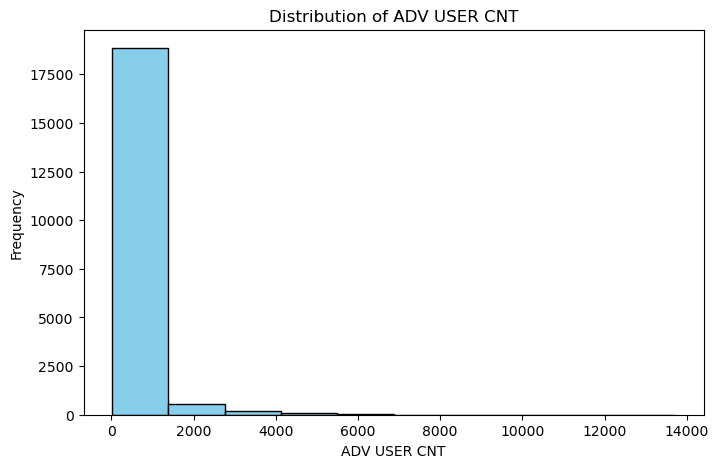

In [29]:
import matplotlib.pyplot as plt

# Plotting a histogram for 'ADV USER CNT'
plt.figure(figsize=(8, 5))
plt.hist(df['ADV USER CNT'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of ADV USER CNT')
plt.xlabel('ADV USER CNT')
plt.ylabel('Frequency')
plt.show()


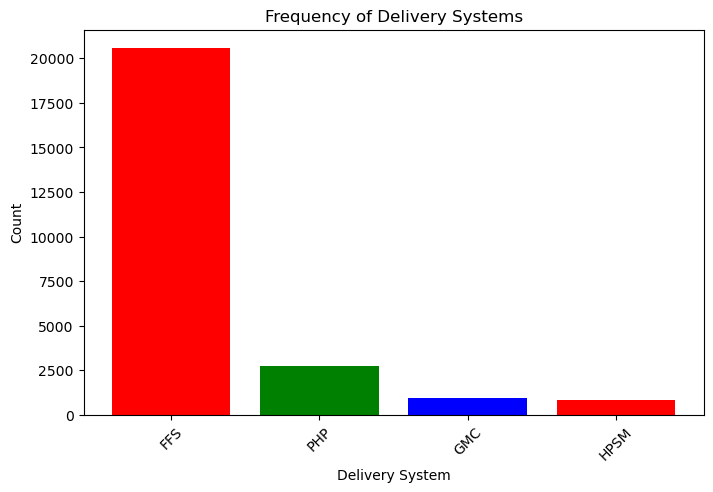

In [30]:
# Bar Chart for 'DELIVERY SYSTEM' categories
category_counts = df['DELIVERY SYSTEM'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values, color=['red', 'green', 'blue'])
plt.title('Frequency of Delivery Systems')
plt.xlabel('Delivery System')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

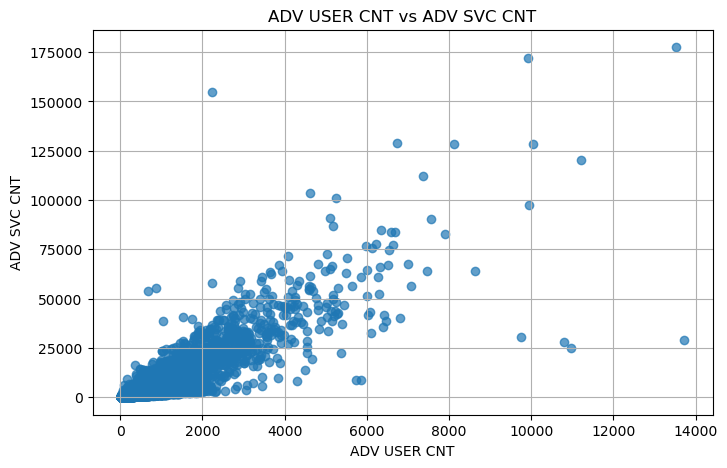

In [31]:
# Scatter Plot for 'ADV USER CNT' vs 'ADV SVC CNT'
plt.figure(figsize=(8, 5))
plt.scatter(df['ADV USER CNT'], df['ADV SVC CNT'], alpha=0.7)
plt.title('ADV USER CNT vs ADV SVC CNT')
plt.xlabel('ADV USER CNT')
plt.ylabel('ADV SVC CNT')
plt.grid(True)
plt.show()

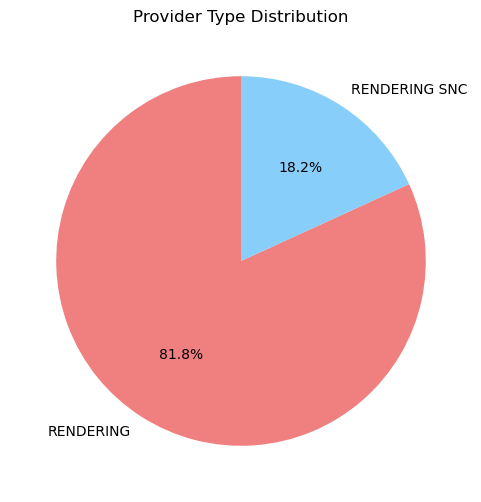

In [32]:
# Pie Chart for 'PROVIDER TYPE' distribution
provider_type_counts = df['PROVIDER TYPE'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(provider_type_counts, labels=provider_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Provider Type Distribution')
plt.show()

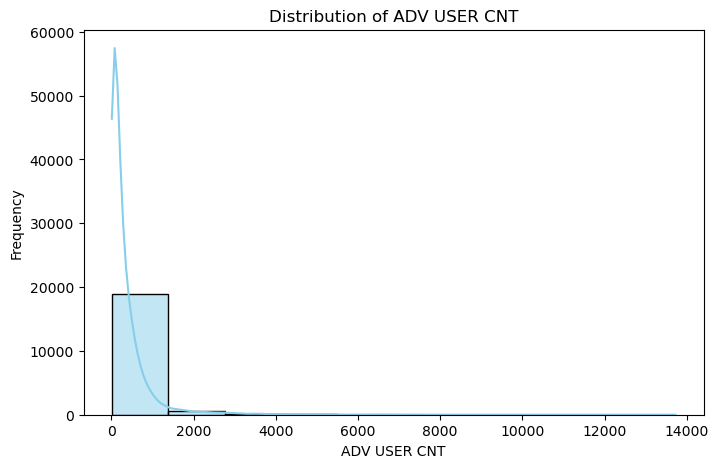

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a histogram for 'ADV USER CNT' using Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(df['ADV USER CNT'].dropna(), bins=10, color='skyblue', kde=True)  # kde=True adds a kernel density estimate curve
plt.title('Distribution of ADV USER CNT')
plt.xlabel('ADV USER CNT')
plt.ylabel('Frequency')
plt.show()

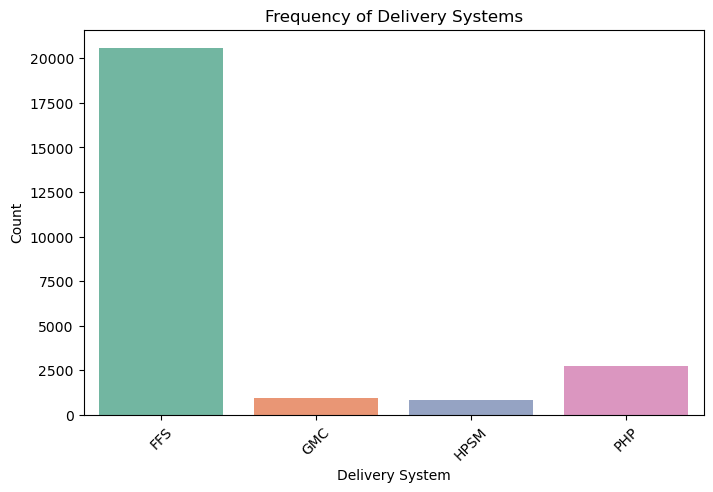

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='DELIVERY SYSTEM', data=df, hue='DELIVERY SYSTEM', palette='Set2')
plt.title('Frequency of Delivery Systems')
plt.xlabel('Delivery System')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

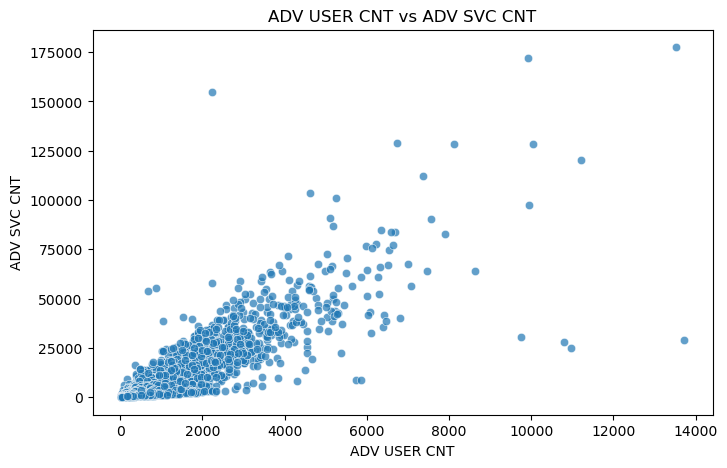

In [36]:
# Scatter Plot for 'ADV USER CNT' vs 'ADV SVC CNT'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ADV USER CNT', y='ADV SVC CNT', data=df, alpha=0.7)
plt.title('ADV USER CNT vs ADV SVC CNT')
plt.xlabel('ADV USER CNT')
plt.ylabel('ADV SVC CNT')
plt.show()

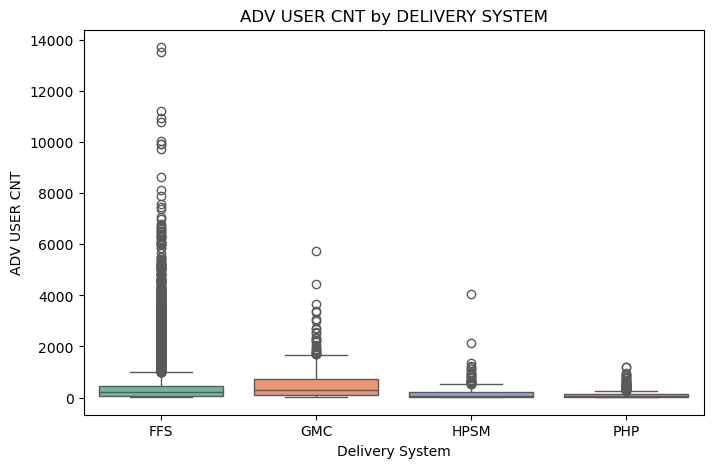

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='DELIVERY SYSTEM', y='ADV USER CNT', data=df, hue='DELIVERY SYSTEM', palette='Set2')
plt.title('ADV USER CNT by DELIVERY SYSTEM')
plt.xlabel('Delivery System')
plt.ylabel('ADV USER CNT')
plt.show()